# Week 7.
## Sentiment analysis first!

In [1]:
import nltk
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords

In [5]:
imdb = pd.read_csv("imdb_dataset.csv", nrows = 10000, encoding='cp949')

In [7]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
reviews = pd.DataFrame(imdb)

In [9]:
reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


##  Preprocessing

In [10]:
stop_words = stopwords.words('english')

In [11]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
#Idea: we want to tokenize the reviews, delete stopwords, and rejoin them again

def preprocess_reviews(review):
    preprocessed_review = review
    preprocessed_review = re.sub('<.*?>',' ', review) #get rid of hashtags
    preprocessed_review = " ".join(word for word in preprocessed_review.split() if word not in stop_words)
    return(preprocessed_review)

In [13]:
reviews['Processed review']=reviews['review'].apply(lambda x: preprocess_reviews(x))

In [14]:
reviews.head()

,review,sentiment,Processed review
0,One of the other reviewers has mentioned that ...,positive,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,Basically there's family little boy (Jake) thi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love Time Money"" visually stu..."


In [16]:
text = TextBlob("Hello, I hate to admit, but I am working on Saturday night! I am leaving for a business trip in a couple of hours. Damn")

In [17]:
text.tags

[('Hello', 'NNP'),
 ('I', 'PRP'),
 ('hate', 'VBP'),
 ('to', 'TO'),
 ('admit', 'VB'),
 ('but', 'CC'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('working', 'VBG'),
 ('on', 'IN'),
 ('Saturday', 'NNP'),
 ('night', 'NN'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('leaving', 'VBG'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('business', 'NN'),
 ('trip', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('couple', 'NN'),
 ('of', 'IN'),
 ('hours', 'NNS'),
 ('Damn', 'NN')]

In [18]:
text.sentences

[Sentence("Hello, I hate to admit, but I am working on Saturday night!"),
 Sentence("I am leaving for a business trip in a couple of hours."),
 Sentence("Damn")]

In [19]:
TextBlob("Hello, I hate to admit, but I am working on Saturday night! I am leaving for a business trip in a couple of hours. Damn").sentiment

Sentiment(polarity=-1.0, subjectivity=0.9)

In [20]:
TextBlob("There are 4 people in this room").sentiment #very factual info & neutral

Sentiment(polarity=0.0, subjectivity=0.0)

In [21]:
TextBlob("There are 4 people in this room").sentiment.subjectivity

0.0

In [22]:
reviews['polarity']=reviews['Processed review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [23]:
reviews

,review,sentiment,Processed review,polarity
0,One of the other reviewers has mentioned that ...,positive,One reviewers mentioned watching 1 Oz episode ...,0.041946
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...,0.125651
2,I thought this was a wonderful way to spend ti...,positive,I thought wonderful way spend time hot summer ...,0.290873
3,Basically there's a family where a little boy ...,negative,Basically there's family little boy (Jake) thi...,0.004167
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love Time Money"" visually stu...",0.234551
...,...,...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive,"Fun, entertaining movie WWII German spy (Julie...",0.267659
9996,Give me a break. How can anyone say that this ...,negative,"Give break. How anyone say ""good hockey movie""...",0.038089
9997,This movie is a bad movie. But after watching ...,negative,This movie bad movie. But watching endless ser...,-0.011169
9998,This is a movie that was probably made to ente...,negative,This movie probably made entertain middle scho...,0.009250


In [26]:
reviews['subjectivity']=reviews['Processed review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [28]:
reviews.head(20)

,review,sentiment,Processed review,polarity,subjectivity
0,One of the other reviewers has mentioned that ...,positive,One reviewers mentioned watching 1 Oz episode ...,0.041946,0.498325
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...,0.125651,0.567708
2,I thought this was a wonderful way to spend ti...,positive,I thought wonderful way spend time hot summer ...,0.290873,0.693651
3,Basically there's a family where a little boy ...,negative,Basically there's family little boy (Jake) thi...,0.004167,0.459259
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love Time Money"" visually stu...",0.234551,0.409686
5,"Probably my all-time favorite movie, a story o...",positive,"Probably all-time favorite movie, story selfle...",0.045455,0.551515
6,I sure would like to see a resurrection of a u...,positive,I sure would like see resurrection dated Seahu...,0.258712,0.472096
7,"This show was an amazing, fresh & innovative i...",negative,"This show amazing, fresh & innovative idea 70'...",0.118561,0.624621
8,Encouraged by the positive comments about this...,negative,Encouraged positive comments film I looking fo...,-0.204025,0.714299
9,If you like original gut wrenching laughter yo...,positive,If like original gut wrenching laughter like m...,0.445833,0.583333


In [31]:
reviews['polarity'].mean()

0.09959056126377781

In [32]:
reviews['subjectivity'].mean()

0.5297154166534326

## simple visualization

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/daffa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='polarity', ylabel='Density'>

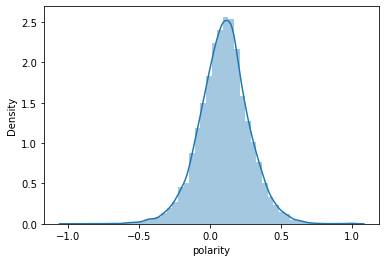

In [34]:
sns.distplot(reviews['polarity'])

/Users/daffa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='subjectivity', ylabel='Density'>

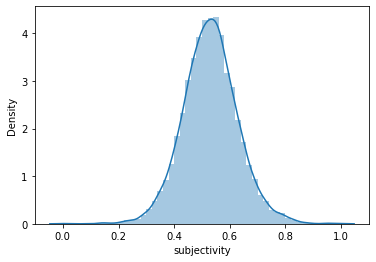

In [35]:
sns.distplot(reviews['subjectivity'])